# Multi-Task Learning for Computer Vision Classification with Keras

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json, csv

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [3]:
print('Shape of CIFAR10 dataset: \n', )
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Get number of instances for each class

airplane_count = 0
automobile_count = 0
bird_count = 0
cat_count = 0
deer_count = 0
dog_count = 0
frog_count = 0
horse_count = 0
ship_count = 0
truck_count = 0

for sample in y_train:
    if sample == 0:
        airplane_count += 1
    elif sample == 1:
        automobile_count += 1
    elif sample == 2:
        bird_count += 1
    elif sample == 3:
        cat_count += 1
    elif sample == 4:
        deer_count += 1
    elif sample == 5:
        dog_count += 1
    elif sample == 6:
        frog_count += 1
    elif sample == 7:
        horse_count += 1
    elif sample == 8:
        ship_count += 1
    elif sample == 9:
        truck_count += 1
        
print('\n')
print(f'Number of samples of the class airplane: {airplane_count}')
print(f'Number of samples of the class automobile: {automobile_count}')
print(f'Number of samples of the class bird: {bird_count}')
print(f'Number of samples of the class cat: {cat_count}')
print(f'Number of samples of the class deer: {deer_count}')
print(f'Number of samples of the class dog: {dog_count}')
print(f'Number of samples of the class frog: {frog_count}')
print(f'Number of samples of the class horse: {horse_count}')
print(f'Number of samples of the class ship: {ship_count}')
print(f'Number of samples of the class truck: {truck_count}')

print('\nThe dataset is completely balanced')


Shape of CIFAR10 dataset: 

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Number of samples of the class airplane: 5000
Number of samples of the class automobile: 5000
Number of samples of the class bird: 5000
Number of samples of the class cat: 5000
Number of samples of the class deer: 5000
Number of samples of the class dog: 5000
Number of samples of the class frog: 5000
Number of samples of the class horse: 5000
Number of samples of the class ship: 5000
Number of samples of the class truck: 5000

The dataset is completely balanced


# Import datasets
## Todo: Split them into train-val-test
### Todo: After, split into train-val and use test on kaggle


In [52]:
with open('C:/Users/agkat/Documents/College/1. SML/A1/domain1_train.json', 'r') as file:
   domain1_data = [json.loads(line) for line in file]

with open('C:/Users/agkat/Documents/College/1. SML/A1/domain2_train.json', 'r') as file:
    domain2_data = [json.loads(line) for line in file]


# Rearrange data

In [54]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the combined data into training and validation sets
d1_train, d1_val = train_test_split(domain1_data, test_size=0.2, random_state=42)

# Separate the text and labels from the training set
Xd1 = [instance['text'] for instance in d1_train]
Yd1 = [instance['label'] for instance in d1_train]

# Separate the text and labels from the validation set
Xvald1 = [instance['text'] for instance in d1_val]
Yvald1 = [instance['label'] for instance in d1_val]

# Pad to length
Xd1 = pad_sequences(Xd1, padding='post', value=0, maxlen=1075)
Xvald1 = pad_sequences(Xvald1, padding='post', value=0, maxlen=1075)


In [57]:
d2_train[0].keys()

dict_keys(['text', 'label'])

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the combined data into training and validation sets
d2_train, d2_val = train_test_split(domain2_data, test_size=0.2, random_state=42)


# Separate the text and labels from the training set
Xd2 = [instance['text'] for instance in d2_train]
Yd2 = [instance['label'] for instance in d2_train]


# Separate the text and labels from the validation set
Xvald2 = [instance['text'] for instance in d2_val]
Yvald2 = [instance['label'] for instance in d2_val]

# Pad to length
Xd2 = pad_sequences(Xd2, padding='post', value=0, maxlen=1075)
Xvald2 = pad_sequences(Xvald2, padding='post', value=0, maxlen=1075)

In [21]:
X1 = list([list(x) for x in Xd1])
X2 = list([list(x) for x in Xd2])

X1 = np.array(X1)
X2 = np.array(X2)
Yd1 = np.array(Yd1)
Yd2 = np.array(Yd2)


# Now creating simpler model structure

In [48]:
# Little more complicated
d1i = tf.keras.layers.Input(shape=(1075, ), name='d1')
d2i = tf.keras.layers.Input(shape=(1075, ), name='d2')

integer_lookup = tf.keras.layers.IntegerLookup(vocabulary=list(range(0,5000)))

domain1_task = integer_lookup(d1i)
domain2_task = integer_lookup(d2i)

shared_layer1 = tf.keras.layers.Dense(16, activation='relu')
shared_layer2 = tf.keras.layers.Dense(16, activation='relu')
shared_layer3 = tf.keras.layers.Dense(16, activation='relu')

domain1_task = shared_layer1(domain1_task)
domain1_task = shared_layer2(domain1_task)
domain1_task = shared_layer3(domain1_task)

domain2_task = shared_layer1(domain2_task)
domain2_task = shared_layer2(domain2_task)
domain2_task = shared_layer3(domain2_task)

domain1_task = tf.keras.layers.Dense(8, activation='relu')(domain1_task)
domain1_task = tf.keras.layers.Dense(1, activation='sigmoid', name='D1O')(domain1_task)

domain2_task = tf.keras.layers.Dense(8, activation='relu')(domain2_task)
domain2_task = tf.keras.layers.Dense(1, activation='sigmoid', name='D2O')(domain2_task)


model = tf.keras.Model(inputs = [d1i, d2i], outputs = [domain1_task, domain2_task])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], loss_weights=[0.5, 0.5])

# Train the model
history = model.fit([X1, X2], [Yd1, Yd2], epochs=20, validation_split=0.3)

# Make predictions
# predictions = model.predict(X2)

Epoch 1/20
326/326 [==============================] - 3s 7ms/step - loss: 3.9899 - D1O_loss: 1.6006 - D2O_loss: 6.3793 - D1O_accuracy: 0.8848 - D2O_accuracy: 0.6250 - val_loss: 3.5715 - val_D1O_loss: 6.5419 - val_D2O_loss: 0.6011 - val_D1O_accuracy: 0.0506 - val_D2O_accuracy: 0.9653
Epoch 2/20
326/326 [==============================] - 2s 6ms/step - loss: 0.5212 - D1O_loss: 0.3979 - D2O_loss: 0.6445 - D1O_accuracy: 0.9146 - D2O_accuracy: 0.7816 - val_loss: 2.0832 - val_D1O_loss: 3.6678 - val_D2O_loss: 0.4985 - val_D1O_accuracy: 0.0461 - val_D2O_accuracy: 0.9877
Epoch 3/20
326/326 [==============================] - 2s 6ms/step - loss: 0.4399 - D1O_loss: 0.3001 - D2O_loss: 0.5798 - D1O_accuracy: 0.9249 - D2O_accuracy: 0.7903 - val_loss: 1.6711 - val_D1O_loss: 2.9144 - val_D2O_loss: 0.4277 - val_D1O_accuracy: 0.0866 - val_D2O_accuracy: 0.9944
Epoch 4/20
326/326 [==============================] - 2s 6ms/step - loss: 0.4072 - D1O_loss: 0.2682 - D2O_loss: 0.5461 - D1O_accuracy: 0.9298 - D2O_

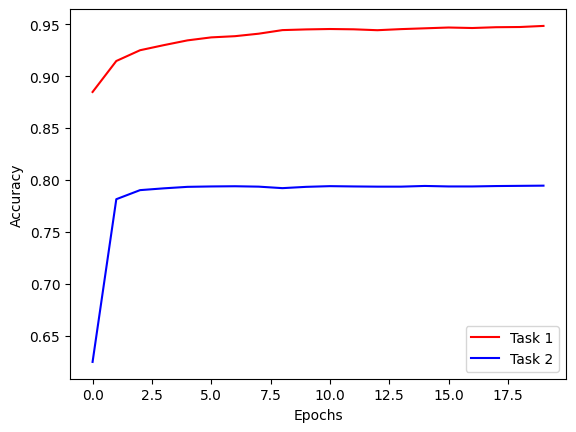

In [49]:
plt.plot(range(len(history.history['D1O_accuracy'])), history.history['D1O_accuracy'], c='r', label='Task 1')
plt.plot(range(len(history.history['D2O_accuracy'])), history.history['D2O_accuracy'], c='b', label='Task 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

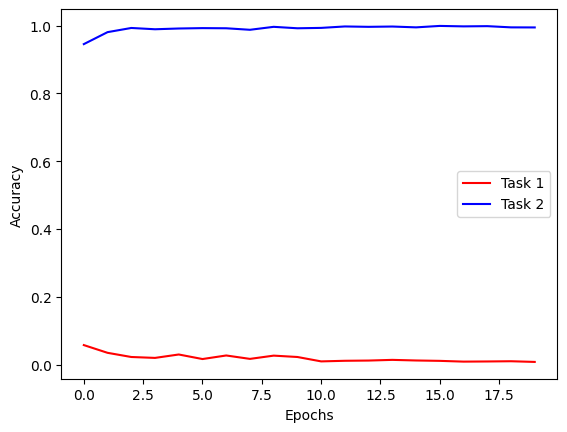

In [47]:
plt.plot(range(len(history.history['val_D1O_accuracy'])), history.history['val_D1O_accuracy'], c='r', label='Task 1')
plt.plot(range(len(history.history['val_D2O_accuracy'])), history.history['val_D2O_accuracy'], c='b', label='Task 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
history.history.keys()

dict_keys(['loss', 'D1O_loss', 'D2O_loss', 'D1O_accuracy', 'D2O_accuracy', 'val_loss', 'val_D1O_loss', 'val_D2O_loss', 'val_D1O_accuracy', 'val_D2O_accuracy'])

In [43]:
from sklearn.metrics import accuracy_score
predictions = model.predict(Xval)
predictions = [1 if p >= 0.5 else 0 for p in predictions]
accuracy_score(predictions, Yval)

NameError: name 'Xval' is not defined

## Fit batch of models

In [123]:
import time
# FIT BATCH OF MODELS

def fit_batch(gamma_values):
    
    history = list()
    trained_models = list()
    
    print('Starting training on batch of models for gamma values ', gamma_values, '\n\n')
    
    for gamma in gamma_values:
        
        print('Training model for gamma equal to ', gamma)
        model = buildModel(gamma)
        start = time.time()
        # model_history = model.fit([Xd1, Xd2],[Yd1, Yd2], epochs=5, batch_size=128, verbose=0)
        model_history = model.fit([X1, X2],[Yd1, Yd2], epochs=25, batch_size=64, verbose=0, validation_split=0.2)
        print(f'Training time: {time.time() - start}\n')
        history.append(model_history)
        trained_models.append(model)
        
    return history, trained_models
        

In [124]:
gammas = [0., 0.5, 1.]
training_history, trained_models = fit_batch(gammas)

Starting training on batch of models for gamma values  [0.0, 0.5, 1.0] 


Training model for gamma equal to  0.0
Training time: 96.97163558006287

Training model for gamma equal to  0.5
Training time: 95.72155499458313

Training model for gamma equal to  1.0
Training time: 95.03765082359314



## Plot Accuracies

In [125]:
import matplotlib.pyplot as plt


def plot_multitask_accuracies(gammas, training_history):
    
    counter = 0

    for history in training_history:

        print(f'\nPlotting Accuracy vs Epochs for value of gamma number {gammas[counter]}\n')
        plt.plot(range(len(history.history['task_1_output_accuracy'])), history.history['task_1_output_accuracy'], c='r', label='Task 1')
        plt.plot(range(len(history.history['task_2_output_accuracy'])), history.history['task_2_output_accuracy'], c='b', label='Task 2')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        counter += 1
    


Plotting Accuracy vs Epochs for value of gamma number 0.0



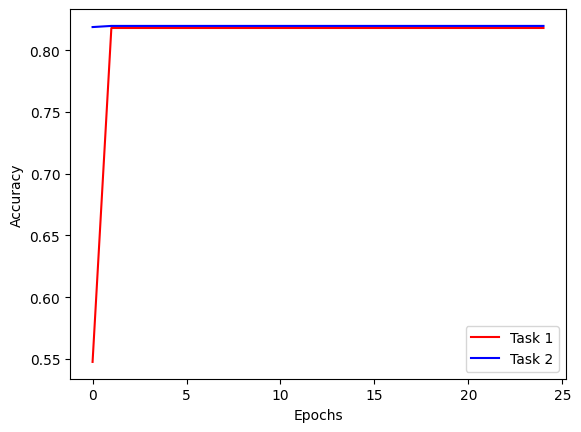


Plotting Accuracy vs Epochs for value of gamma number 0.5



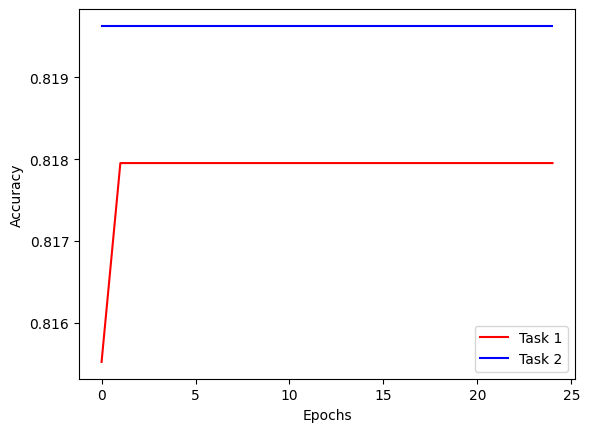


Plotting Accuracy vs Epochs for value of gamma number 1.0



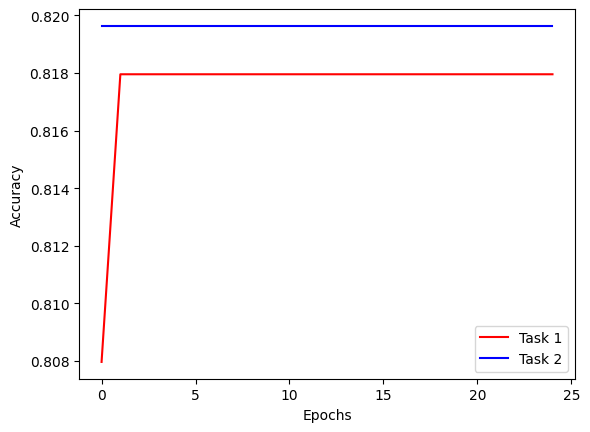

In [126]:
plot_multitask_accuracies(gammas, training_history)

## Test set now

In [127]:
with open('C:/Users/agkat/Documents/College/1. SML/A1/test_set.json', 'r') as file:
   test_data = [json.loads(line) for line in file]

Expected labels:  [0. 0. 0. 0. 1. 0. 0. 0.] [1. 0.]
(1, 32, 32, 3)


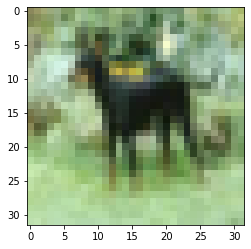

In [13]:
import random

# Pick random image of test data, which will be used to evaluate each task
random_ind = random.randrange(0, x_test.shape[0], 1)
image = x_test[random_ind,:,:,:]
print('Expected labels: ', y_test_1[random_ind], y_test_2[random_ind])
plt.imshow(image)

image = np.expand_dims(image, axis=0)
print(image.shape)


In [14]:
# Get prediction for both tasks, and compare them to the real classes 
# (predictions will be done on the model trained with gamma=0.5)

trained_model = trained_models[2]
for pred in trained_model.predict(image):
    print('Task prediction: ', np.argmax(pred))
# trained_model.predict(image)

1/1 [==============================] - 0s 79ms/step
Task prediction:  4
Task prediction:  0


In [129]:
# Separate the text and labels from the training set
test_text = [instance['text'] for instance in test_data]
test_text = pad_sequences(test_text, padding='post', value=0, maxlen=1075)
X_test = np.array([np.array(lst) for lst in test_text])

In [130]:
X_test

array([[  59,    2, 3434, ...,    0,    0,    0],
       [   2,  785,    6, ...,    0,    0,    0],
       [3306,    4,    2, ...,    0,    0,    0],
       ...,
       [   2,  495,  752, ...,    0,    0,    0],
       [   2, 4433,  299, ...,    0,    0,    0],
       [   9, 1017,    4, ...,    0,    0,    0]])

In [133]:
pred = model.predict([X_test, X_test])

32/32 [==============================] - 0s 4ms/step


In [159]:
model.predict([X1[0:2], X1[0:2]])

1/1 [==============================] - 0s 16ms/step


[array([[0.5071332 ],
        [0.99996144]], dtype=float32),
 array([[0.4998563 ],
        [0.49971664]], dtype=float32)]

In [156]:
for p in pred[1]:
    print(p, p==0.5)

[0.49971664] [False]
[0.49971664] [False]
[0.49999753] [False]
[0.49971664] [False]
[0.49971783] [False]
[0.4997168] [False]
[0.49999383] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49999717] [False]
[0.5] [ True]
[0.4997167] [False]
[0.4999666] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.4999999] [False]
[0.49971664] [False]
[0.4997378] [False]
[0.49999994] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49974594] [False]
[0.49999985] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.5] [ True]
[0.49971664] [False]
[0.49976802] [False]
[0.49971664] [False]
[0.49972025] [False]
[0.49973726] [False]
[0.49971664] [False]
[0.49971673] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.5] [ True]
[0.5] [ True]
[0.49999997] [False]
[0.5] [ True]
[0.4998187] [False]
[0.49999997] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.5] [ True]
[0.49971664] [False]
[0.49971664] [False]
[0.49971664] [False